In [3]:
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sobel_canny_detector import *
import matplotlib.pyplot as plt

# Load dataset & Preprocessing
Load the ASL train dataset from the local directory, already preprocessed images by using sobel-canny edge detection techniques.

In [4]:
import random
import cv2

dataset_directory = './preprocessed/sobel-canny-combination'
sign_types = ['A', 'B', 'C', 'D', 'del', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'nothing', 'O', 'P', 'Q', 'R', 'S', 'space', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z'] 
label_and_image_paths = [(sign_type, f'{dataset_directory}/{sign_type}/{sign_type}{i}.jpg') for sign_type in sign_types
                                                                     for i in range(1, 3001)]
random.seed(180)
random.shuffle(label_and_image_paths)

split_point = int(len(label_and_image_paths) * 0.8)
train_list = label_and_image_paths[:split_point]
test_list = label_and_image_paths[split_point:]

# SGD Classifier

In [5]:
from sklearn.linear_model import SGDClassifier

batch_size = 32
n_neighbors = 5

# Initialize Classifier model
model = SGDClassifier(loss='hinge', alpha=0.01, max_iter=1000, random_state=180)

print("----[Model Train Start]----")
# Train model in batches
for batch_start in range(0, len(train_list), batch_size):
  batch_end = batch_start + batch_size
  batch_list = train_list[batch_start:batch_end]

  print(f'Batch {batch_start}/{len(train_list)}')

  # Load images
  images = []
  labels = []
  for label, path in batch_list:
    image = cv2.imread(path)
    images.append(image.flatten())
    labels.append(label)
  images = np.array(images)
  labels = np.array(labels)

  # Partially train the model
  model.partial_fit(images, labels, np.array(sign_types))

print("----[Model Train End]----")

----[Model Train Start]----
Batch 0/69600
Batch 32/69600
Batch 64/69600
Batch 96/69600
Batch 128/69600
Batch 160/69600
Batch 192/69600
Batch 224/69600
Batch 256/69600
Batch 288/69600
Batch 320/69600
Batch 352/69600
Batch 384/69600
Batch 416/69600
Batch 448/69600
Batch 480/69600
Batch 512/69600
Batch 544/69600
Batch 576/69600
Batch 608/69600
Batch 640/69600
Batch 672/69600
Batch 704/69600
Batch 736/69600
Batch 768/69600
Batch 800/69600
Batch 832/69600
Batch 864/69600
Batch 896/69600
Batch 928/69600
Batch 960/69600
Batch 992/69600
Batch 1024/69600
Batch 1056/69600
Batch 1088/69600
Batch 1120/69600
Batch 1152/69600
Batch 1184/69600
Batch 1216/69600
Batch 1248/69600
Batch 1280/69600
Batch 1312/69600
Batch 1344/69600
Batch 1376/69600
Batch 1408/69600
Batch 1440/69600
Batch 1472/69600
Batch 1504/69600
Batch 1536/69600
Batch 1568/69600
Batch 1600/69600
Batch 1632/69600
Batch 1664/69600
Batch 1696/69600
Batch 1728/69600
Batch 1760/69600
Batch 1792/69600
Batch 1824/69600
Batch 1856/69600
Batch 

# Model Evaluation

In [6]:
import warnings
warnings.filterwarnings('ignore')

# Test the model
all_labels = []
all_predictions = []
for batch_start in range(0, len(test_list), batch_size):
  batch_end = batch_start + batch_size
  batch_list = test_list[batch_start:batch_end]

  # Load images
  images = []
  labels = []
  for label, path in batch_list:
    image = cv2.imread(path)
    images.append(image.flatten())
    labels.append(label)
  images = np.array(images)
  labels = np.array(labels)

  # Partially train the model
  y_pred = model.predict(images)
  
  # Append tested labels and results in batch
  all_labels.extend(labels)
  all_predictions.extend(y_pred)

In [7]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

# Evaluate function
def evaluate_model(actual, predicts):
  acc_score = accuracy_score(actual, predicts)
  report = classification_report(actual, predicts)
  report_dict = classification_report(actual, predicts, output_dict=True)

  print(f'----------Model Evaluation Result----------- ')
  print(f'Total Accuracy: {round(acc_score, 2)}')
  print(report)

  return report_dict

----------Model Evaluation Result----------- 
Total Accuracy: 0.81
              precision    recall  f1-score   support

           A       0.92      0.63      0.75       627
           B       0.71      0.79      0.75       628
           C       0.82      0.78      0.80       586
           D       0.67      0.85      0.75       596
           E       0.88      0.70      0.78       629
           F       0.62      0.90      0.73       616
           G       0.81      0.79      0.80       629
           H       0.93      0.83      0.88       612
           I       0.89      0.83      0.86       546
           J       0.84      0.90      0.87       586
           K       0.94      0.81      0.87       577
           L       0.85      0.92      0.88       619
           M       0.92      0.80      0.86       616
           N       0.91      0.87      0.89       628
           O       0.91      0.82      0.86       578
           P       0.91      0.85      0.88       600
           Q  

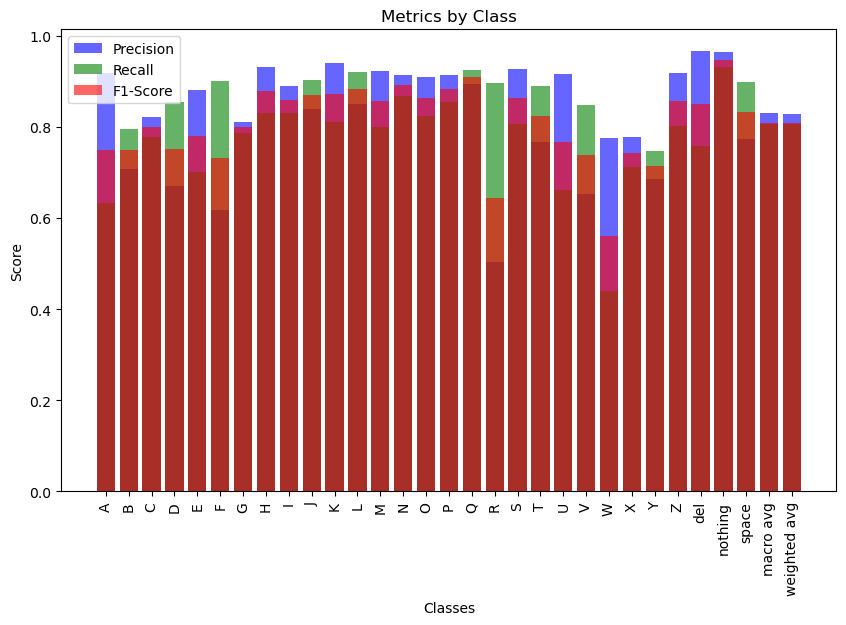

In [18]:
report = evaluate_model(all_labels, all_predictions)

labels = []
precisions = []
recalls = []
f1_scores = []
for label, metrics in report.items():
  if not isinstance(metrics, dict): continue

  labels.append(label)
  precisions.append(metrics['precision'])
  recalls.append(metrics['recall'])
  f1_scores.append(metrics['f1-score'])


# Plot metrics for each class
plt.figure(figsize=(10, 6))
plt.bar(labels, precisions, label='Precision', alpha=0.6, color='b')
plt.bar(labels, recalls, label='Recall', alpha=0.6, color='g')
plt.bar(labels, f1_scores, label='F1-Score', alpha=0.6, color='r')
plt.xlabel('Classes')
plt.ylabel('Score')
plt.xticks(rotation=90)
plt.title('Metrics by Class')
plt.legend()
plt.show()